<a href="https://colab.research.google.com/github/Avupati-Sai-Likhitha/Major-Project-Sentiment-Analysis-/blob/main/Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
reviews = pd.read_csv('Scraping.csv')

In [ ]:
reviews['Cleaned_Reviews'] = reviews['Customer_Reviews']

In [ ]:
reviews

,Customer_Reviews,Cleaned_Reviews
0,"\n\n Very slim ,light weight easily carry in ...","\n\n Very slim ,light weight easily carry in ..."
1,\n\n I bought this exchanging my Acer Aspire ...,\n\n I bought this exchanging my Acer Aspire ...
2,\n\n initial impression is excellent...light ...,\n\n initial impression is excellent...light ...
3,"\n\n I am a Computer Technician, and i have p...","\n\n I am a Computer Technician, and i have p..."
4,\n\n I am writing this review after using the...,\n\n I am writing this review after using the...
...,...,...
1654,\n\n Good\n\n,\n\n Good\n\n
1655,"\n\n Disappointed, slowest speed I seen ever,...","\n\n Disappointed, slowest speed I seen ever,..."
1656,\n\n I would request buyers to kindly check t...,\n\n I would request buyers to kindly check t...
1657,"\n\n Disappointed, slowest speed I seen ever,...","\n\n Disappointed, slowest speed I seen ever,..."


In [ ]:
import nltk
nltk.download('stopwords')
stopwords_list = nltk.corpus.stopwords.words('english')
stopwords_list.remove('no')
stopwords_list.remove('not')
stopwords_list.remove("doesn't")
print(stopwords_list)
len(stopwords_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

176

In [ ]:
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
def remove_stopwords(text):
  tokens = tokenizer.tokenize(text)
  tokens = [token.strip() for token in tokens]
  filtered_tokens = [token for token in tokens if token not in stopwords_list]
  new_text = ' '.join(filtered_tokens)
  return new_text

In [ ]:
import string
def remove_punctuation(text):
  new_text="".join([x for x in text if x not in string.punctuation])
  return new_text

In [ ]:
def remove_html(text):
  soup = BeautifulSoup(text,'html.parser')
  new_text = soup.get_text()
  return new_text

In [ ]:
!pip install unidecode
import unidecode
def remove_accents(text):
  new_text = unidecode.unidecode(text)
  return new_text

     |████████████████████████████████| 245kB 3.8MB/s 


In [ ]:
!pip install contractions
import contractions
def contraction(text):
  new_text = contractions.fix(text)
  return new_text

     |████████████████████████████████| 327kB 2.8MB/s 
     |████████████████████████████████| 286kB 5.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85399 sha256=08bc6223f28352cb2b6aabcf84be07abc3f2aa722339dcb1861bc27d68944b3e
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
import re
def remove_special_chars(text):
  change = r'[^A-Za-z0-9\s]'
  new_text = re.sub(change,'',text)
  return new_text

In [ ]:
def remove_extraspace(text):
    return  " ".join(text.split())

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
lem = WordNetLemmatizer()
def convert(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None
def lemmatizing(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], convert(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lem.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
reviews['Cleaned_Reviews'] = reviews['Cleaned_Reviews'].apply(lambda x: x.strip('\n'))

In [ ]:
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(lambda x:x.lower())
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(remove_stopwords)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(remove_html)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(remove_accents)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(contraction)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(remove_special_chars)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(remove_extraspace)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(remove_punctuation)
reviews.Cleaned_Reviews = reviews.Cleaned_Reviews.apply(lemmatizing)

In [ ]:
reviews.head()

,Customer_Reviews,Cleaned_Reviews
0,"\n\n Very slim ,light weight easily carry in ...",slim light weight easily carry travelinggood b...
1,\n\n I bought this exchanging my Acer Aspire ...,buy exchange acer aspire v5 intel i3 laptop si...
2,\n\n initial impression is excellent...light ...,initial impression excellent light weight thin...
3,"\n\n I am a Computer Technician, and i have p...",computer technician purchase configured 5 thes...
4,\n\n I am writing this review after using the...,write review use laptop one month1 m office 20...


In [ ]:
reviews.sample(5)

,Customer_Reviews,Cleaned_Reviews
1226,\n\n Looks are good and its slimAnd charges r...,looks good slimand charge really fastits batte...
73,\n\n Entry level laptop.For students .Not for...,entry level laptopfor student not game
106,"\n\n Sir, I want service and warranty but Not...",sir want service warranty not informationmany ...
618,\n\n At such price the laptop is good for bas...,price laptop good basic office work online bro...
86,\n\n Best value for money. For day to day wor...,best value money day day work


In [ ]:
!pip install VaderSentiment

     |████████████████████████████████| 133kB 3.9MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vs = SentimentIntensityAnalyzer()

In [ ]:
reviews['Sentiment_score'] = reviews['Cleaned_Reviews'].apply(lambda x: vs.polarity_scores(x)['compound'])

In [ ]:
reviews.head()

,Customer_Reviews,Cleaned_Reviews,Sentiment_score
0,"\n\n Very slim ,light weight easily carry in ...",slim light weight easily carry travelinggood b...,0.7650
1,\n\n I bought this exchanging my Acer Aspire ...,buy exchange acer aspire v5 intel i3 laptop si...,0.4417
2,\n\n initial impression is excellent...light ...,initial impression excellent light weight thin...,0.6808
3,"\n\n I am a Computer Technician, and i have p...",computer technician purchase configured 5 thes...,0.9758
4,\n\n I am writing this review after using the...,write review use laptop one month1 m office 20...,0.9383


In [ ]:
reviews

,Customer_Reviews,Cleaned_Reviews,Sentiment_score
0,"\n\n Very slim ,light weight easily carry in ...",slim light weight easily carry travelinggood b...,0.7650
1,\n\n I bought this exchanging my Acer Aspire ...,buy exchange acer aspire v5 intel i3 laptop si...,0.4417
2,\n\n initial impression is excellent...light ...,initial impression excellent light weight thin...,0.6808
3,"\n\n I am a Computer Technician, and i have p...",computer technician purchase configured 5 thes...,0.9758
4,\n\n I am writing this review after using the...,write review use laptop one month1 m office 20...,0.9383
...,...,...,...
1654,\n\n Good\n\n,good,0.4404
1655,"\n\n Disappointed, slowest speed I seen ever,...",disappointed slow speed see ever sigma dealer ...,-0.8360
1656,\n\n I would request buyers to kindly check t...,would request buyer kindly check product buy l...,0.4019
1657,"\n\n Disappointed, slowest speed I seen ever,...",disappointed slow speed see ever sigma dealer ...,-0.8360


In [ ]:
def sentiment(num):
  if num>=0.05:
    return 'positive'
  elif num<=-0.05:
    return 'negative'
  else:
    return 'neutral'


In [ ]:
reviews['Sentiment'] = reviews['Sentiment_score'].apply(lambda x: sentiment(x))

In [ ]:
reviews

,Customer_Reviews,Cleaned_Reviews,Sentiment_score,Sentiment
0,"\n\n Very slim ,light weight easily carry in ...",slim light weight easily carry travelinggood b...,0.7650,positive
1,\n\n I bought this exchanging my Acer Aspire ...,buy exchange acer aspire v5 intel i3 laptop si...,0.4417,positive
2,\n\n initial impression is excellent...light ...,initial impression excellent light weight thin...,0.6808,positive
3,"\n\n I am a Computer Technician, and i have p...",computer technician purchase configured 5 thes...,0.9758,positive
4,\n\n I am writing this review after using the...,write review use laptop one month1 m office 20...,0.9383,positive
...,...,...,...,...
1654,\n\n Good\n\n,good,0.4404,positive
1655,"\n\n Disappointed, slowest speed I seen ever,...",disappointed slow speed see ever sigma dealer ...,-0.8360,negative
1656,\n\n I would request buyers to kindly check t...,would request buyer kindly check product buy l...,0.4019,positive
1657,"\n\n Disappointed, slowest speed I seen ever,...",disappointed slow speed see ever sigma dealer ...,-0.8360,negative


In [ ]:
reviews.sample(5)

,Customer_Reviews,Cleaned_Reviews,Sentiment_score,Sentiment
1644,\n\n Very good product..Very usefull\n\n,good product usefull,0.4404,positive
1281,\n\n Good\n\n,good,0.4404,positive
1634,\n\n Best laptop\n\n,best laptop,0.6369,positive
502,\n\n Product description does not mention any...,product description not mention anything scree...,0.0000,neutral
1337,\n\n Worst product.\n\n,bad product,-0.5423,negative


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


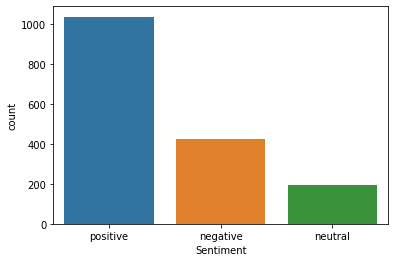

In [ ]:
import seaborn as sns
sns.countplot(reviews['Sentiment'])

In [ ]:
reviews.to_csv('Amazon_Reviews.csv',index=False)